# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        get_sigmoid = 1.0/(1 + np.exp(-np.dot(X,  weights.T)))
        return get_sigmoid
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        h=1/(1 + np.power(np.exp, -np.matmul(weights,X)))
        get_loss = (-y * np.log(h) - (1-y) * np.log(1-h)).maen()
        return get_loss
        
    
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
            
            
        for i in range(self.max_iter):
            #delta = 'yor code'
            #delta = self.weights_ / self.C
            delta = y[i] * (1 -1/(1 + np.exp(y[i] * (np.dot([i], self.weights_[i])))))
            self.weights_ -= self.eta * delta
            if self.max_iter or np.linalg.norm(self.weights_ - self.zero_init) < tol:
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        return np.where(self.predict_proba(X) >= 1, -1)

In [5]:
#temp=[]
#for j in range(X.shape[0]):
#q=1-1/(1 + np.exp(-self.weights_ @ X_ext[j] * y[j])
#temp.append(X_ext[j] * y[j] * q)

In [6]:
from sklearn import datasets
from sklearn import metrics

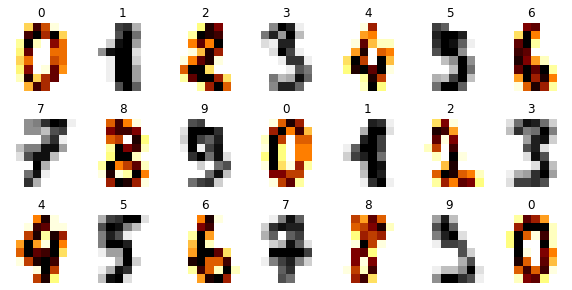

In [7]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_,axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [9]:
y_train.shape

(1437,)

In [10]:
y_test.shape

(360,)

In [11]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [48]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [49]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [50]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

In [51]:
lr_clf.fit(X_train, y_train)

In [ ]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [150]:
model = CustomLogisticRegression()

In [154]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [155]:
train_acc, test_acc

In [49]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [63]:
№Get training and test loss histories

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code


< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        #square = np.square(X-Y)
        #sum_s=np.sum(square)
        #get_pairwise_distances = np.sqrt(sum_s)
        #return get_pairwise_distances
        #get_pairwise_distances = np.sqrt(sum(pow(X-Y, 2) for X, Y in zip(X, Y)))
        get_pairwise_distances = euclidean_distances(X, Y)
        return get_pairwise_distances
   
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        #sum_w = weights + y
        #get_class_weights = get_pairwise_distances / sum_w
        return get_class_weights          
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [13]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [14]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

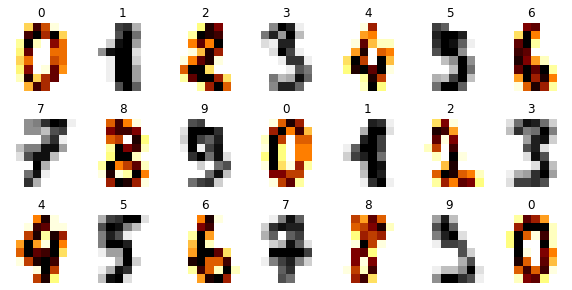

In [16]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [61]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [17]:
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [18]:
#Load and read data  
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [19]:
print('Number of passengers in original dataset:' + str(len(data.index)))

Number of passengers in original dataset:100000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [21]:
data.isnull().sum().sort_values(ascending = False)

Cabin          67866
Ticket          4623
Age             3292
Embarked         250
Fare             134
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
dtype: int64

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,100000.0,49999.500000,28867.657797,0.00,24999.75,49999.50,74999.25,99999.00
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.00,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.00,3.00
Age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.00,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.00,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.00,9.00
Fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.50,744.66


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [23]:
#Number females and males in the dataset
male=data['Sex']
male 

0          male
1          male
2          male
3          male
4          male
          ...  
99995    female
99996      male
99997      male
99998      male
99999      male
Name: Sex, Length: 100000, dtype: object

Text(0.5, 1.0, 'Sex')

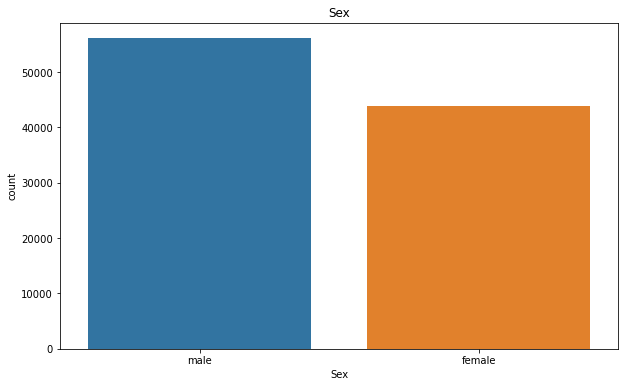

In [24]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(data["Sex"])
plt.title("Sex")

Text(0.5, 1.0, 'Count of Survived')

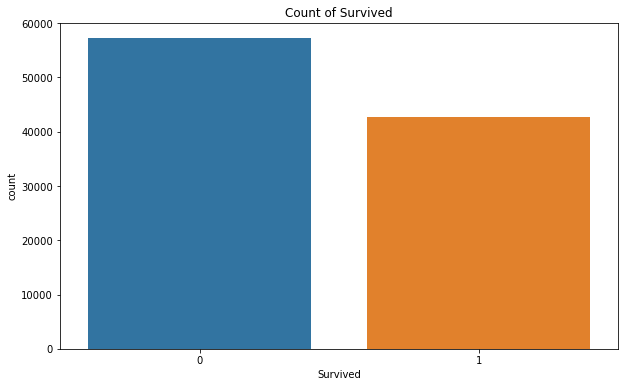

In [25]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(data["Survived"])
plt.title("Count of Survived")

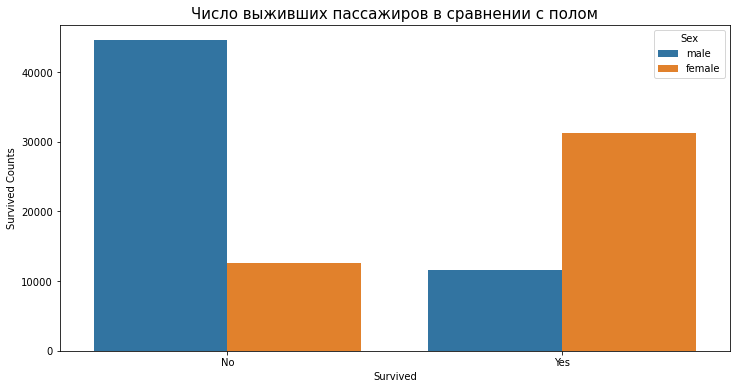

In [26]:
fig = plt.figure(figsize=(12,6))
g = sns.countplot(x='Survived', hue='Sex', data=data)
plt.ylabel("Survived Counts")
plt.title("Число выживших пассажиров в сравнении с полом",size=15)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Исходя из графиков представленных выше можно сказать, что на борту лайнера большая часть пассажиров представлена мужским полом, но исходя из предпоследних графиков видно, что среди выживших большая часть женщин. Смею предположить, что это связано в первую очередь с тем, что шлюпки выдавались в первую очередь женщинам.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

In [27]:
#Age_research
data['Age'].describe().T

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

In [28]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda group: group.fillna(group.mean()))
data['Age'] = data['Age'].apply(lambda x: math.floor(x))

<AxesSubplot:ylabel='Age'>

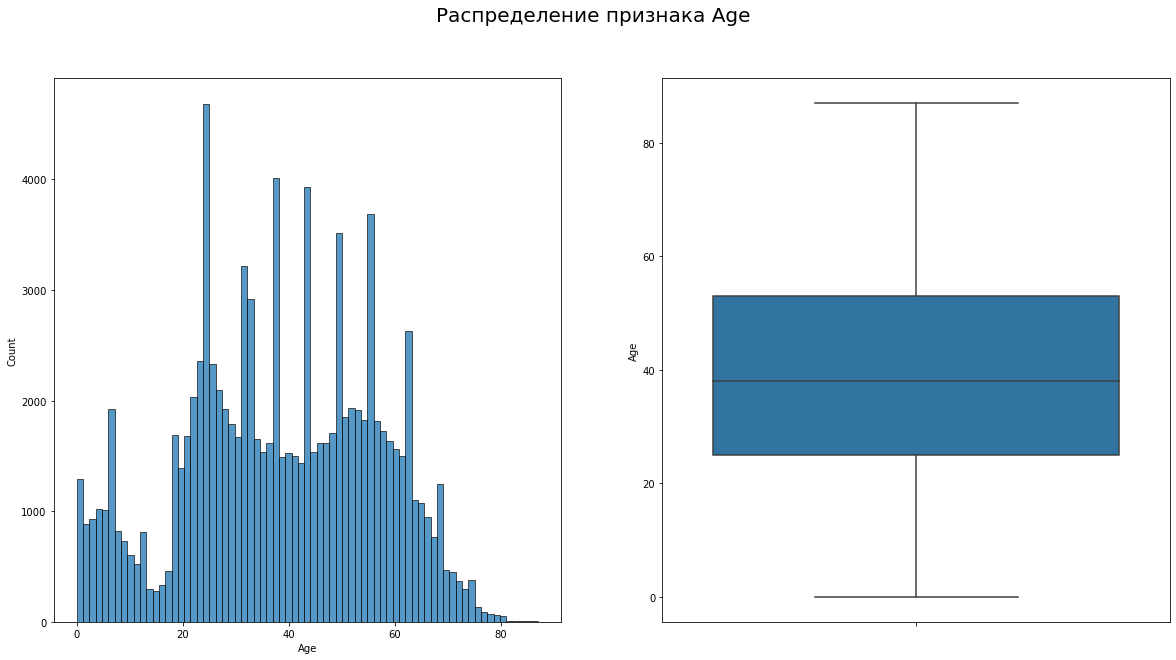

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Распределение признака Age', fontsize=20)
sns.histplot(ax=axes[0], data=data, x="Age")
sns.boxplot(ax=axes[1], data=data, y="Age")

In [30]:
print('The mean of "Age" is %.2f' %(data["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' %(data["Age"].median(skipna=True)))

The mean of "Age" is 38.33
The median of "Age" is 38.00


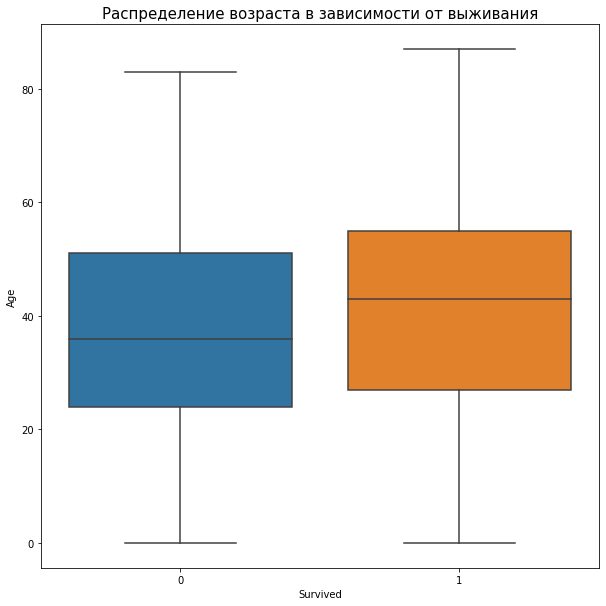

In [31]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="Survived", y="Age", data=data);
plt.title("Распределение возраста в зависимости от выживания", {"fontsize": 15});

- Исходя из графиков выше можно сказать, что большая часть выживших пассажиров находится в диапозоне от 20 до 60 лет. Среднее значение возраста составляет 38 лет. Возможно, это связано со статусом и возможностями более старшего поколения. 

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [32]:
PassenderClass=data['Pclass']
PassenderClass.unique()

array([1, 3, 2])

array([<AxesSubplot:ylabel='Class'>], dtype=object)

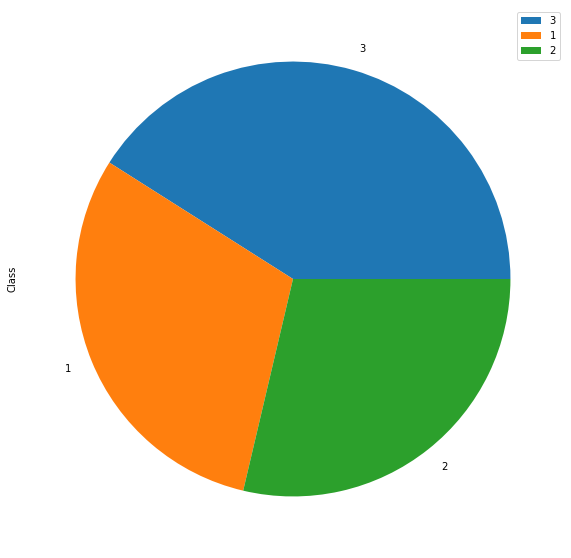

In [33]:
data["Pclass"].value_counts().to_frame("Class").plot(kind="pie", subplots=True, figsize=(10, 10))

- Анализируя диаграмму выше можно заметить, что большая часть пассажиров относится к 3 классу.

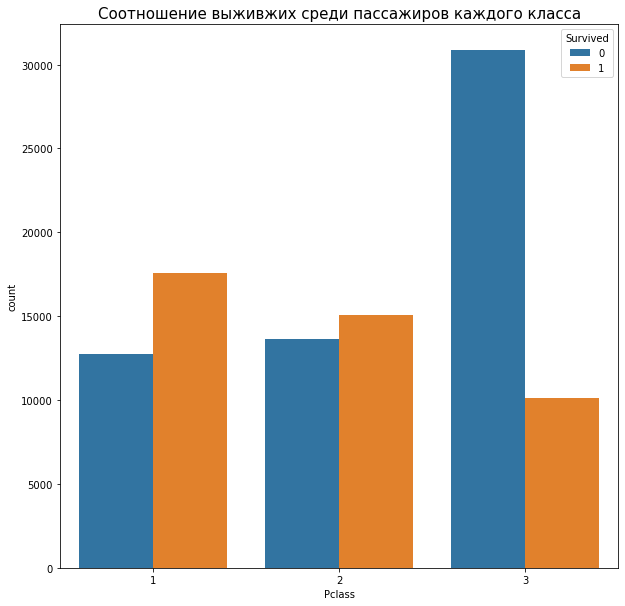

In [34]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Pclass", hue="Survived", data=data);
plt.title("Соотношение выживжих среди пассажиров каждого класса", {"fontsize": 15});

- Среди пассажиров первого и второго класса выживших больше, чем среди пассажиров третьего класса. В первую очередь это может объясняется расположением кают, так как каюты третьего класса находятся на нижних палубах, что обуславливает трудность при спасении. Можно сказать, что первый класс является наиболее безопасным и характеризуется большим количеством выживших. 

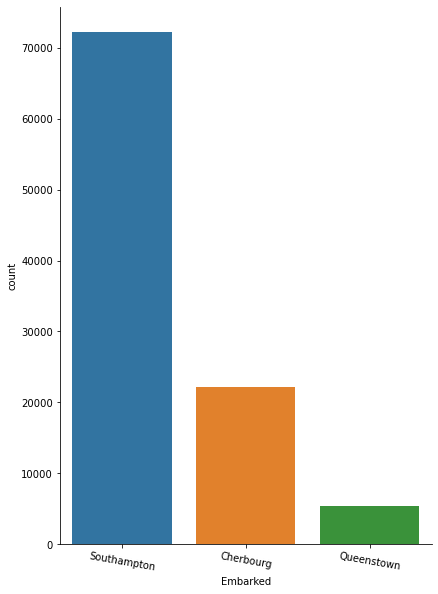

In [35]:
sns.catplot(data=data["Embarked"].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}).to_frame(),
            x="Embarked",
            kind="count",
            height=8,
            aspect=3/4)
plt.xticks(rotation=-10)
plt.show()

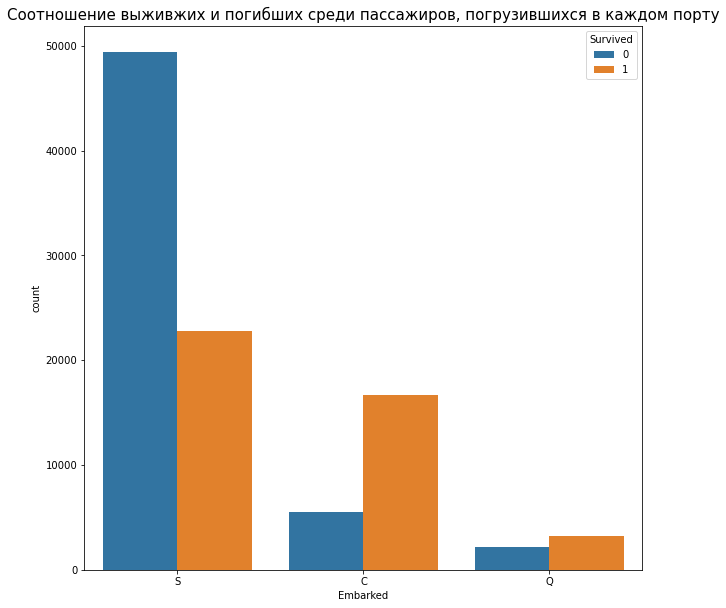

In [36]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Embarked", hue="Survived", data=data);
plt.title("Соотношение выживжих и погибших среди пассажиров, погрузившихся в каждом порту", {"fontsize": 15});

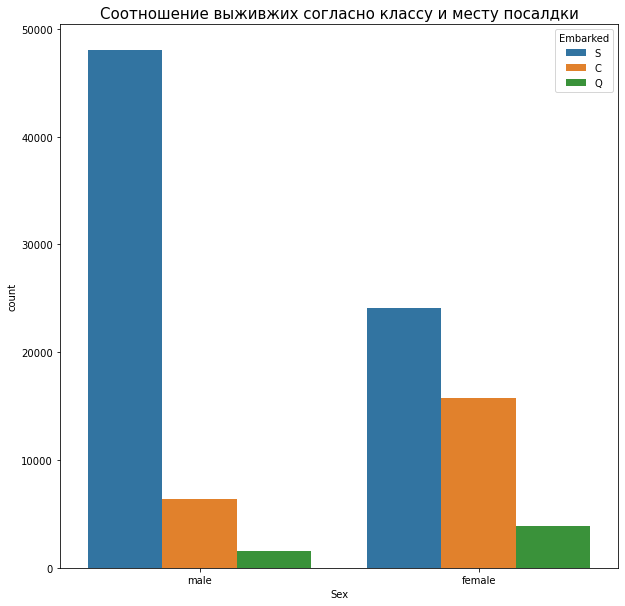

In [37]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Sex", hue="Embarked", data=data);
plt.title("Соотношение выживжих согласно классу и месту посалдки", {"fontsize": 15});

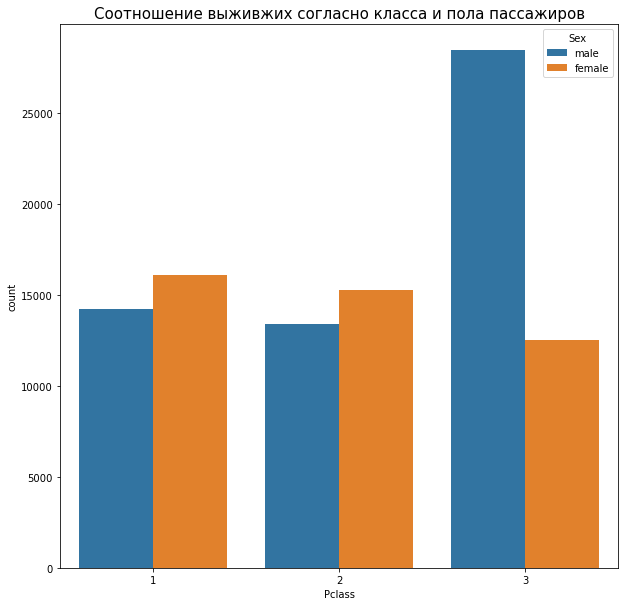

In [38]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x="Pclass", hue="Sex", data=data);
plt.title("Соотношение выживжих согласно класса и пола пассажиров", {"fontsize": 15});

- Исходя из графиков выше можно наблюдать, что большая часть пассажиров садилась в порту Саутгемптон (S), из которых выжило 31%. Это связано с тем, что пассажиров плывших на корабле из порта Саутгемптон (S) 3 классом составляло треть от всех пассажиров. При этом основную часть из них составляли мужчины (около 70%). А как было показано ранее, наименьший процент выживания был у мужчин, плывших третьим классом.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [39]:
for col in data.columns:
    print('{} - {} %'.format(col, np.mean(data[col].isnull()*100)))

PassengerId - 0.0 %
Survived - 0.0 %
Pclass - 0.0 %
Name - 0.0 %
Sex - 0.0 %
Age - 0.0 %
SibSp - 0.0 %
Parch - 0.0 %
Ticket - 4.623 %
Fare - 0.134 %
Cabin - 67.866 %
Embarked - 0.25 %


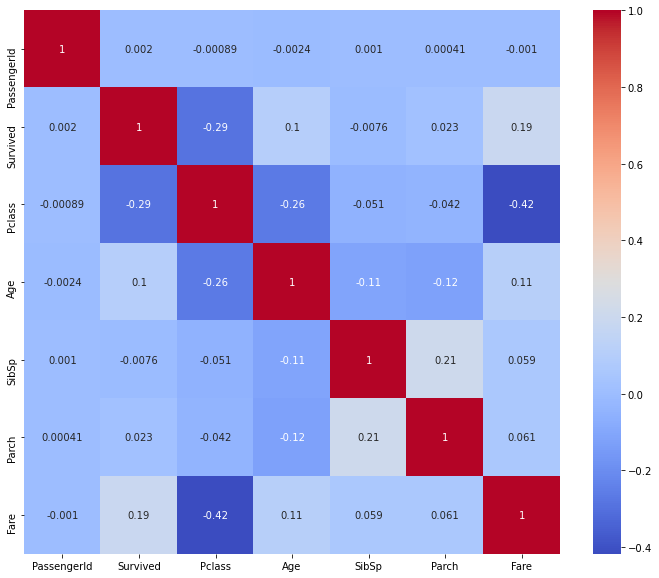

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm' )
plt.show()

In [41]:
data1=data.drop(columns = ['Ticket', 'Cabin'],axis = 1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,"Oconnor, Frankie",male,44,2,0,27.14,S
1,1,0,3,"Bryan, Drew",male,33,0,0,13.35,S
2,2,0,3,"Owens, Kenneth",male,0,1,2,71.29,S
3,3,0,3,"Kramer, James",male,19,0,0,13.04,S
4,4,1,3,"Bond, Michael",male,25,0,0,7.76,S
...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62,0,0,14.86,C
99996,99996,0,2,"Brown, Herman",male,66,0,0,11.15,S
99997,99997,0,3,"Childress, Charles",male,37,0,0,9.95,S
99998,99998,0,3,"Caughlin, Thomas",male,51,0,1,30.92,S


In [42]:
for col in data1.columns:
    print('{} - {} %'.format(col, np.mean(data1[col].isnull()*100)))

PassengerId - 0.0 %
Survived - 0.0 %
Pclass - 0.0 %
Name - 0.0 %
Sex - 0.0 %
Age - 0.0 %
SibSp - 0.0 %
Parch - 0.0 %
Fare - 0.134 %
Embarked - 0.25 %


In [43]:
data1['Age'] = data1.groupby('Pclass')['Age'].transform(lambda group: group.fillna(group.mean()))
data1['Age'] = data1['Age'].apply(lambda x: math.floor(x))

In [44]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,"Oconnor, Frankie",male,44,2,0,27.14,S
1,1,0,3,"Bryan, Drew",male,33,0,0,13.35,S
2,2,0,3,"Owens, Kenneth",male,0,1,2,71.29,S
3,3,0,3,"Kramer, James",male,19,0,0,13.04,S
4,4,1,3,"Bond, Michael",male,25,0,0,7.76,S
...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62,0,0,14.86,C
99996,99996,0,2,"Brown, Herman",male,66,0,0,11.15,S
99997,99997,0,3,"Childress, Charles",male,37,0,0,9.95,S
99998,99998,0,3,"Caughlin, Thomas",male,51,0,1,30.92,S


In [45]:
data1['Fare'] = data1['Fare'].fillna(data1['Fare'].median())
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])

In [46]:
for col in data1.columns:
    print('{} - {} %'.format(col, np.mean(data1[col].isnull()*100)))

PassengerId - 0.0 %
Survived - 0.0 %
Pclass - 0.0 %
Name - 0.0 %
Sex - 0.0 %
Age - 0.0 %
SibSp - 0.0 %
Parch - 0.0 %
Fare - 0.0 %
Embarked - 0.0 %


In [52]:
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data2 = data1.drop(['PassengerId','SibSp', 'Parch'], axis=1)
data2

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,1,"Oconnor, Frankie",male,44,27.14,S,3
1,0,3,"Bryan, Drew",male,33,13.35,S,1
2,0,3,"Owens, Kenneth",male,0,71.29,S,4
3,0,3,"Kramer, James",male,19,13.04,S,1
4,1,3,"Bond, Michael",male,25,7.76,S,1
...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62,14.86,C,1
99996,0,2,"Brown, Herman",male,66,11.15,S,1
99997,0,3,"Childress, Charles",male,37,9.95,S,1
99998,0,3,"Caughlin, Thomas",male,51,30.92,S,2


In [59]:
df=data2['Name']

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?
-  Значения колонки -возраст- я решила заменить  средним значением согласно классу пассажира
- Колонки -цена билета- и -место посадки- также было решено обработать в сторону моды
- Колонки -SibSp- и -Parch- было решено занести в одну FamilySize, так как они обобщают значения в ранее названных колонках 

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [60]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [62]:
df['Title'] = data2['Name'].apply(get_title)
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([data2, title_one_hot], axis=1)

In [63]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title_Aaron,Title_Abbey,...,Title_Zita,Title_Zoe,Title_Zofia,Title_Zoila,Title_Zola,Title_Zona,Title_Zora,Title_Zoraida,Title_Zulema,Title_Zulma
0,1,1,"Oconnor, Frankie",male,44,27.14,S,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,"Bryan, Drew",male,33,13.35,S,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,"Owens, Kenneth",male,0,71.29,S,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,"Kramer, James",male,19,13.04,S,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,"Bond, Michael",male,25,7.76,S,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
## Logistic Regression
# One-Hot Encode(convert categoracal values into)
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
data3= pd.concat([df, sex_one_hot], axis=1)
data3

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title_Aaron,Title_Abbey,...,Title_Zofia,Title_Zoila,Title_Zola,Title_Zona,Title_Zora,Title_Zoraida,Title_Zulema,Title_Zulma,Sex_female,Sex_male
0,1,1,"Oconnor, Frankie",male,44,27.14,S,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3,"Bryan, Drew",male,33,13.35,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,"Owens, Kenneth",male,0,71.29,S,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,3,"Kramer, James",male,19,13.04,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3,"Bond, Michael",male,25,7.76,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62,14.86,C,1,0,0,...,0,0,0,0,0,0,0,0,1,0
99996,0,2,"Brown, Herman",male,66,11.15,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,0,3,"Childress, Charles",male,37,9.95,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,0,3,"Caughlin, Thomas",male,51,30.92,S,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [66]:
Pc1= pd.get_dummies(data3['Pclass'],drop_first=True)
Pc1.head(5)

,2,3
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [67]:
titanic_data= pd.concat([data3,embarked,Pc1], axis=1)
titanic_data

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title_Aaron,Title_Abbey,...,Title_Zora,Title_Zoraida,Title_Zulema,Title_Zulma,Sex_female,Sex_male,Q,S,2,3
0,1,1,"Oconnor, Frankie",male,44,27.14,S,3,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,3,"Bryan, Drew",male,33,13.35,S,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,3,"Owens, Kenneth",male,0,71.29,S,4,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,3,"Kramer, James",male,19,13.04,S,1,0,0,...,0,0,0,0,0,1,0,1,0,1
4,1,3,"Bond, Michael",male,25,7.76,S,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62,14.86,C,1,0,0,...,0,0,0,0,1,0,0,0,1,0
99996,0,2,"Brown, Herman",male,66,11.15,S,1,0,0,...,0,0,0,0,0,1,0,1,1,0
99997,0,3,"Childress, Charles",male,37,9.95,S,1,0,0,...,0,0,0,0,0,1,0,1,0,1
99998,0,3,"Caughlin, Thomas",male,51,30.92,S,2,0,0,...,0,0,0,0,0,1,0,1,0,1


In [68]:
df1=titanic_data.drop('Sex',axis=1)
df=df1.drop('Embarked',axis=1)
df3= df.drop('Name',axis=1)
df_final = df3.drop('Pclass',axis=1)
df_final

,Survived,Age,Fare,FamilySize,Title_Aaron,Title_Abbey,Title_Abbie,Title_Abby,Title_Abdul,Title_Abe,...,Title_Zora,Title_Zoraida,Title_Zulema,Title_Zulma,Sex_female,Sex_male,Q,S,2,3
0,1,44,27.14,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,33,13.35,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,71.29,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,19,13.04,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,1,25,7.76,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,62,14.86,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
99996,0,66,11.15,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
99997,0,37,9.95,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
99998,0,51,30.92,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [69]:
#train_test split
y = df_final['Survived'].values
X = df_final.iloc[:,1:].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

In [71]:
clf = LogisticRegression()

In [72]:
clf.fit(X_train, y_train)

LogisticRegression()

In [73]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7657625
0.7614


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [74]:
## your code
train_preds = clf.predict(X_train)
train_preds

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [75]:
cm = confusion_matrix(y_train, train_preds)

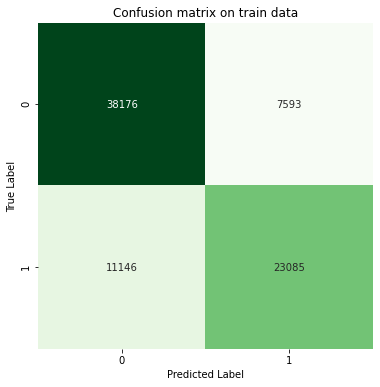

In [76]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

# 
Не удалось загрузить файл из-за изначально неверно выбранной техники обработки данных. Файл оказался слишком большим, возможно, я неправильно поняла логику этапа загрузки файла. Пойму, если за это снимите баллы. Первый раз работают с этой платформой, на будущее буду знать.